In [5]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, MaxPooling2D, BatchNormalization, Dropout, experimental
import numpy as np
import matplotlib.pyplot as plt

In [6]:
model = keras.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(208, 208, 3)),  # свёрточный слой
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),  # уменьшение карт признаков

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2),

    Flatten(),  # нормализация значения после свёрточной слоев
    Dense(128, activation='relu'),  # обычные нейроны
    Dropout(0.2),  # отключения 80 процентов нейронов
    Dense(4, activation='sigmoid'),
])

In [7]:
def data():
    x = []
    y = []
    df = pd.read_csv('_annotations.csv') 
    for i in range(len(df)):
        image_id = df['filename'][i]
        xMin_coord = df['xmin'][i] // 2
        yMin_coord = df['ymin'][i] // 2
        xMax_coord = df['xmax'][i] // 2
        yMax_coord = df['ymax'][i] // 2
        image_id = keras.utils.load_img(image_id, target_size=image_size)
        coordinates = [xMin_coord, yMin_coord, xMax_coord, yMax_coord]
        x.append(np.expand_dims(image_id, axis = 0))
        y.append(coordinates)
    return x,y

In [8]:
def arr(x,y):
    return np.asarray(x),np.asarray(y)

In [9]:
def data_set(x,y):
    return tf.data.Dataset.from_tensor_slices((x,y))

In [10]:
pwd

'C:\\Users\\Matvey\\Проект\\Project'

In [11]:
image_size=(208, 208)
batch_size= 32

In [12]:
%cd DataSet_cars_train/train
x_train, y_train = data()
%cd ../..
%cd DataSet_cars_valid/valid
x_valid, y_valid = data()

C:\Users\Matvey\Проект\Project\DataSet_cars_train\train
C:\Users\Matvey\Проект\Project
C:\Users\Matvey\Проект\Project\DataSet_cars_valid\valid


In [9]:
pwd

'C:\\Users\\Matvey\\Проект\\Project\\DataSet_cars_valid\\valid'

In [10]:
x_train, y_train = arr(x_train, y_train)
x_valid, y_valid = arr(x_valid, y_valid)

In [4]:
x_train

NameError: name 'x_train' is not defined

In [ ]:
y_train

In [11]:
train_dataset = data_set(x_train, y_train)

In [1]:
val_dataset = data_set(x_valid, y_valid)

NameError: name 'data_set' is not defined

In [42]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [39]:
model

In [40]:
train_dataset

<TensorSliceDataset shapes: ((1, 200, 200, 3), (2, 2)), types: (tf.uint8, tf.int32)>

In [41]:
val_dataset

<TensorSliceDataset shapes: ((1, 200, 200, 3), (2, 2)), types: (tf.uint8, tf.int32)>

In [26]:
batch_size

32

In [3]:
his = model.fit(train_dataset, validation_data = val_dataset, epochs=10, batch_size=32)

NameError: name 'train_dataset' is not defined

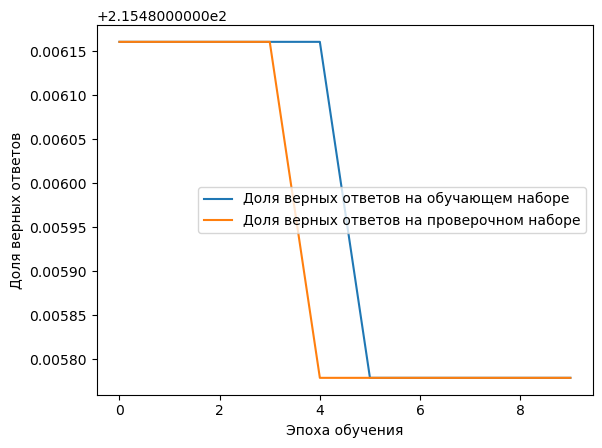

In [144]:
plt.plot(his.history['mae'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(his.history['val_mae'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

In [ ]:
model.save('mae.h5')